# Proctor test

The proctor test is a standardized test that measures the susceptibility to soil compaction. The objective of the test is to identify the maximum dry bulk density value of the soil. Different samples of loose soil are compacted at different moisture contents, but the bulk density is always computed based on dry soil (i.e. after oven-drying the compacted samples).

When the soil is dry the friction between the solid particles prevents achieving high levels of compaction. Increasing amounts of water act as a lubricant and then it is possible compact the soil to a greater degree. Now the particles can move and re-organize to achieve a greater density. Adding excess of water results in lower compaction than at moderate soil mositure levels. Water is an incompressible fluid and thus it absorbes part of the stress, preventing compression. When all the soil pores are filled with water "there is no place to go" for the particles and since water is incompressible, compaction cannot be achieved.

Excessive soil compaction is undesirable in agricultural systems since it diminshes root exploration, reduces soil water storage capacity, creates dense layers that restrict soil water flow, promotes soil crusting, and creates poor seedbed conditions. On the other hand, maximum soil compaction is a desirable property in construction to ensure that building foundations and roads are stable to carry the expected load.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('../datasets/proctor_test.csv',skiprows=[0])
data.head()


,gravimetric_water,dry_bulk_density
0,0.075,1.351
1,0.089,1.428
2,0.106,1.485
3,0.117,1.525
4,0.133,1.566


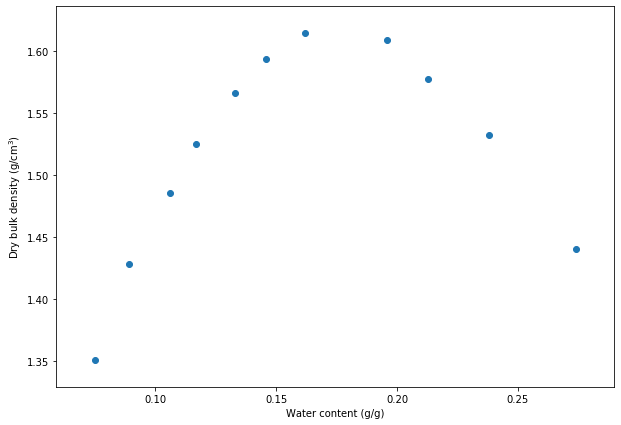

In [5]:
plt.figure(figsize=(10,7))
plt.scatter(data.gravimetric_water, data.dry_bulk_density)
plt.xlabel('Water content (g/g)')
plt.ylabel('Dry bulk density (g/cm$^3$)')
plt.show()


In [6]:
par = np.polyfit(data.gravimetric_water, data.dry_bulk_density, 2)
print(par)


[-22.08573584   8.03425314   0.88349184]


In [7]:
polyfun = np.poly1d(par) # Create objec
print(polyfun) # polynomial function


        2
-22.09 x + 8.034 x + 0.8835


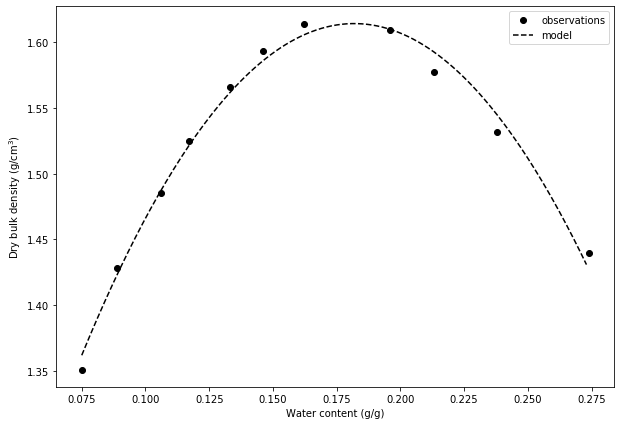

In [8]:
# Plot
water_min = np.min(data.gravimetric_water)
water_max = np.max(data.gravimetric_water)
water_pred = np.arange(water_min, water_max, 0.001)
dry_bulk_density_pred = polyfun(water_pred)

plt.figure(figsize=(10,7))
plt.plot(data.gravimetric_water, data.dry_bulk_density, 'ok', label='observations')
plt.plot(water_pred, dry_bulk_density_pred, '--k', label='model')
plt.xlabel('Water content (g/g)')
plt.ylabel('Dry bulk density (g/cm$^3$)')
plt.legend()
plt.show()

In [34]:
# Find optimal soil moisture and maximum density

first_derivative = np.diff(dry_bulk_density_pred, n=1) # One value shorter
idx_lowest_derivative = np.argmin(np.abs(first_derivative))

max_density = dry_bulk_density_pred[idx_lowest_derivative]
optimal_water = water_pred[idx_lowest_derivative]

print('Maximum dry bulk density:', round(max_density,2),'g/cm^3')
print('Optimal gravimetric soil water content:', round(optimal_water,3),'g/g')

Maximum dry bulk density: 1.61 g/cm^3
Optimal gravimetric soil water content: 0.181 g/g


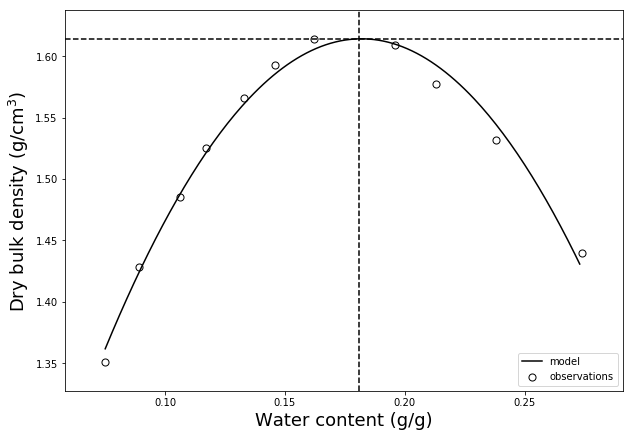

In [53]:
# Complete figure

water_min = np.min(data.gravimetric_water)
water_max = np.max(data.gravimetric_water)
water_pred = np.arange(water_min, water_max, 0.001)
dry_bulk_density_pred = polyfun(water_pred)

plt.figure(figsize=(10,7))
plt.scatter(data.gravimetric_water, data.dry_bulk_density, s=50, marker='o',facecolor='w',edgecolor='k', label='observations')
plt.plot(water_pred, dry_bulk_density_pred, '-k', label='model')
plt.axvline(optimal_water, color='k', linestyle='--')
plt.axhline(max_density, color='k', linestyle='--')
plt.xlabel('Water content (g/g)', size=18)
plt.ylabel('Dry bulk density (g/cm$^3$)', size=18)
plt.legend()
plt.show()


## References

Davidson, J.M., Gray, F. and Pinson, D.I., 1967. Changes in Organic Matter and Bulk Density with Depth Under Two Cropping Systems 1. Agronomy Journal, 59(4), pp.375-378.

Kok, H., Taylor, R.K., Lamond, R.E., and Kessen, S.1996. Soil Compaction: Problems and Solutions. Department of Agronomy. Publication no. AF-115 by the  Kansas State University Cooperative Extension Service. Manhattan, KS. You can find the article at this link: https://bookstore.ksre.ksu.edu/pubs/AF115.pdf

Proctor, R., 1933. Fundamental principles of soil compaction. Engineering news-record, 111(13).